In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import traceback

def effective_order_of_method(U,r,
                              lable = 'График эффективного порядка',
                              draw_flag = False):
    try:
        
        if len(U) < 3:
            raise IndexError()
      #  exp_p = [ (U[i]-U[i+1])/(U[i+1]-U[i+2]) for i in range(len(U)-2) ]
        exp_p = [ (U[i+2]-U[i+1])/(U[i+1]-U[i]) for i in range(len(U)-2) ]
        p = np.log(exp_p)/np.log(r)
        

        if draw_flag:
            plt.figure(figsize=(10,5))
            plt.plot(range(1,len(p)+1), p,'b*-')    
            plt.grid()
            plt.xlabel('№ triple',fontsize=16)
            plt.ylabel(r'$p$',fontsize=16)
            plt.title(lable,fontsize=15)
            plt.show()
            
        return p
        
    except IndexError:
        print('More than three values are required\n',traceback.format_exc())
        return None

In [9]:
def jacobian_f(f, t, u, h):
    
    dim = len(u)
        
    J = np.zeros((dim, dim))
    du = np.eye(dim) * h
    
    for d in range(dim):
        J[d,:] = [(f(t, u + du[dd])[d] - f(t,u - du[dd])[d])/2/h for dd in range(dim)]
                
    return J


def rosenbrock_method(fun, u0, t, a, G):

    dim = len(u0)
    Y = np.zeros(( len(t), dim) )
    Y[0,:] = u0
    
    h = 1e-5
    
    for i in range(len(t) - 1):
                
        dt = t[i+1] - t[i]
        D = G - a * dt * jacobian_f(fun, t[i], Y[i], h)
        F = fun(t[i] + dt/2, Y[i])
        W = np.linalg.solve(D,F)            
        
        Y[i+1, :] = Y[i] + dt * np.real(W)
                                   
    return Y    

In [10]:
def draw_result(t, rk, title):
    c_3 = ['r', 'b']
    c_4 = ['g', 'm']

    plt.figure(figsize=(18, 10))

    for i in range(len(a)):
        plt.plot(t, rk[i][:,0], color = np.random.rand(3), label =  r"U, $\alpha = $" + str(a[i]))
        plt.plot(t, rk[i][:,1], color = np.random.rand(3), label =  r"dU, $\alpha = $" + str(a[i]))
        plt.plot(t, rk[i][:,2], color = np.random.rand(3), label =  r"$d^2U$, $\alpha = $" + str(a[i]))
        plt.plot(t, rk[i][:,3], color = c_3[i], label =  r"$d^3U$, $\alpha = $" + str(a[i]))
        plt.plot(t, rk[i][:,4], color = c_4[i], label =  r"$d^4U$, $\alpha = $" + str(a[i]))


    plt.xlabel('t', fontsize = 20)
    plt.ylabel(r'$u(t)$', fontsize = 20)
    plt.legend(loc = 'best', fontsize = 12)
    plt.title( title , fontsize=20)
    plt.grid()

    plt.show()

def zoom_and_draw_result(t, rk, title):
    
    part_t = round(2*len(t)/3)
    arange = range(part_t, part_t + 100)
    
    plt.figure(figsize=(18, 10))

    plt.plot(t[arange], rk[0][arange, 4], color = 'r', label =  r"$d^3U, \alpha = $" + str(a[0]))
    plt.plot(t[arange], rk[1][arange, 4], color = 'b', label =  r"$d^3U, \alpha = $" + str(a[1]))

    plt.xlabel('t', fontsize = 20)
    plt.ylabel(r'$u(t)$', fontsize = 20)
    plt.legend(loc = 'best', fontsize = 12)
    plt.title( title , fontsize=20)
    plt.grid()

    plt.show()

## №1
Требуется рассчитать работу транзисторного усилителя. Для этого необходимо решить дифференциально-алгебраическую систему.

### Параметры электрической схемы:

In [11]:
r0 = 1000
r1 = 9000
r2 = r3 = r4 = r5 = r1

c1 = 1e-6
c2 = 2e-6
c3 = 3e-6

ub = 6

### Правая часть:

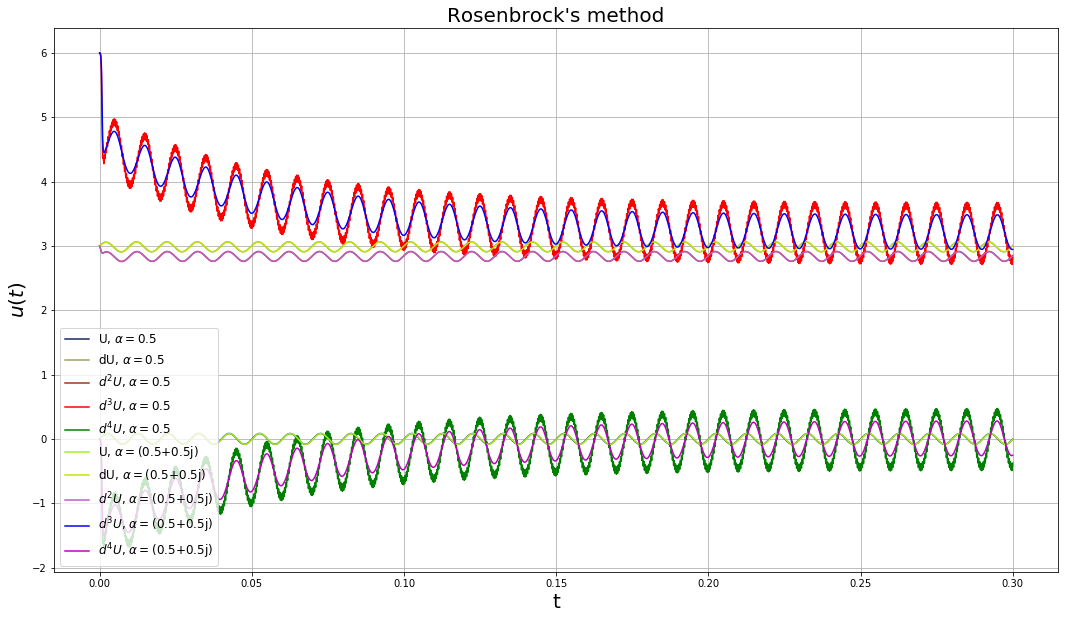

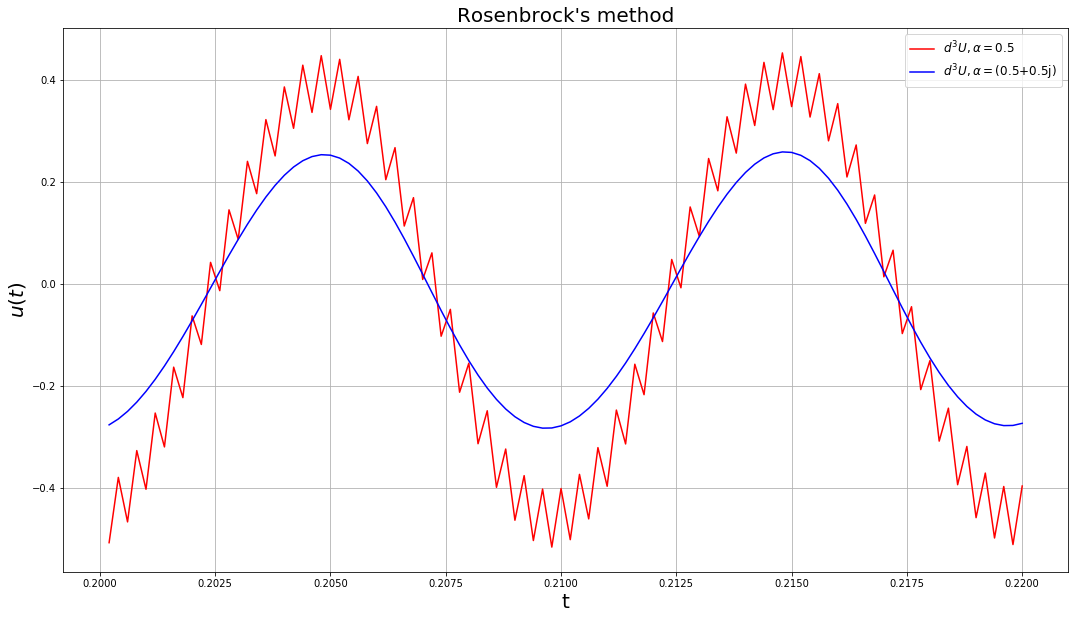

In [18]:
%matplotlib inline

# Начальные условия:
u0 = [0, ub*r1/(r1+r2), ub*r1/(r1+r2), ub, 0]

# Матрица коэффициентов при произоводных:
G = [   [-c1, c1, 0, 0, 0],
        [c1, -c1, 0, 0, 0],
        [0, 0, -c2, 0, 0],
        [0, 0, 0, -c3, c3],
        [0, 0, 0, c3, -c3]
    ]

def ue(t):
    return 0.1 * np.sin(200*np.pi*t)

def ff(u):
    return 1e-6 * (np.exp(u/0.026) - 1)

def F(t, u):
    return [    u[0]/r0 - ue(t)/r0,
                0.01*ff(u[1]-u[2]) - ub/r2 + u[1]*(1/r1 + 1/r2),
                u[2]/r3 - ff(u[1]-u[2]),
                0.99*ff(u[1]-u[2]) - ub/r4 + u[3]/r4,
                u[4]/r5                
           ]

dt = 1/5000
N = round(0.3/dt + 1)
t = np.linspace(0, 0.3, N, endpoint=True)

a = [1/2, (1+1j)/2]

rk = np.array([rosenbrock_method(F, u0, t, aa, G) for aa in a])

title = "Rosenbrock's method"

draw_result(t, rk, title)
zoom_and_draw_result(t, rk, title)

## Автономная система

### Правая часть:

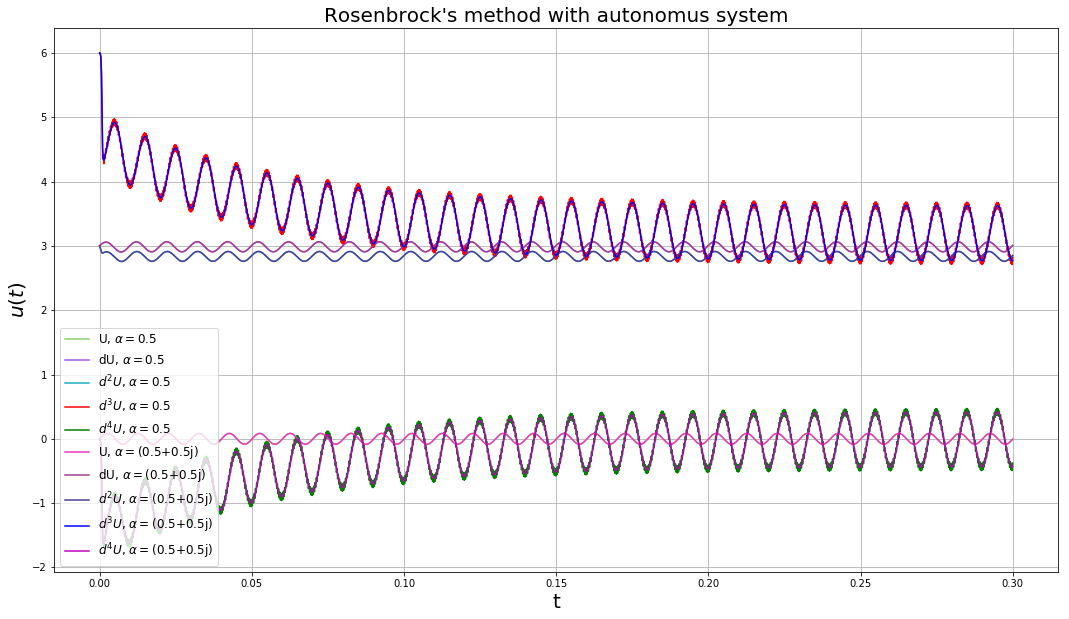

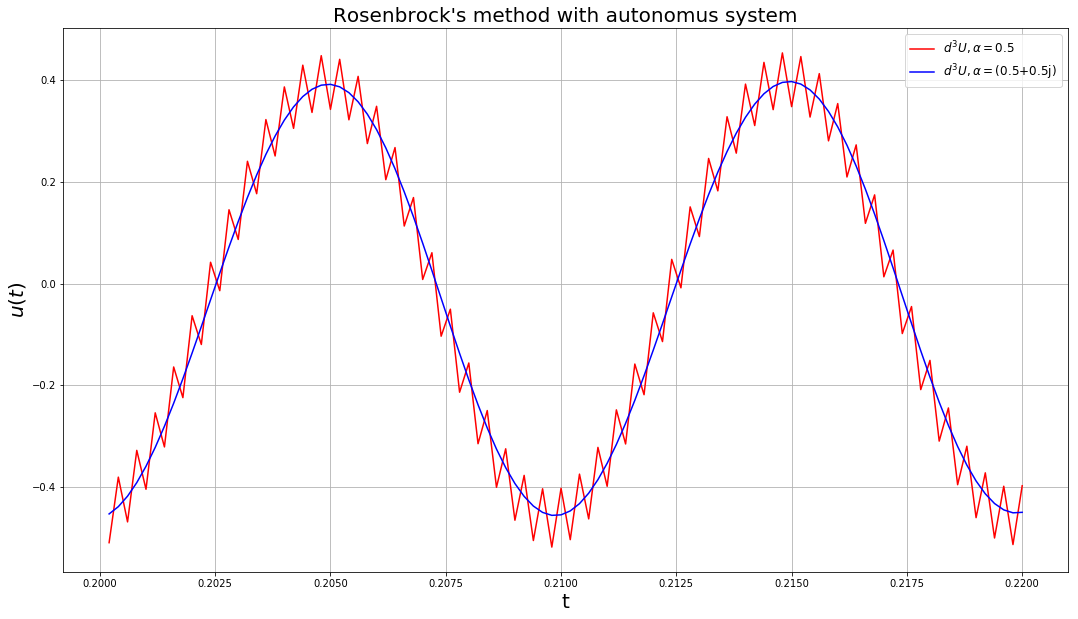

In [13]:
def ue_a(u):
    return 0.1 * np.sin(200*np.pi*u)

def ff_a(u):
    return 1e-6 * (np.exp(u/0.026) - 1)

def F_a(t, u):
    return [    u[0]/r0 - ue_a(u[5])/r0,
                0.01*ff_a(u[1]-u[2]) - ub/r2 + u[1]*(1/r1 + 1/r2),
                u[2]/r3 - ff_a(u[1]-u[2]),
                0.99*ff_a(u[1]-u[2]) - ub/r4 + u[3]/r4,
                u[4]/r5,
                1
           ]

u0_a = [0, ub*r1/(r1+r2), ub*r1/(r1+r2), ub, 0, 0]

# Матрица коэффициентов при произоводных:
G_a = [   [-c1, c1, 0, 0, 0, 0],
        [c1, -c1, 0, 0, 0, 0],
        [0, 0, -c2, 0, 0, 0],
        [0, 0, 0, -c3, c3, 0],
        [0, 0, 0, c3, -c3, 0],
        [0, 0, 0, 0, 0, 1]
    ]

dt = 1/5000
N = round(0.3/dt + 1)
t = np.linspace(0, 0.3, N, endpoint=True)

a = [1/2, (1+1j)/2]

rb_auto = np.array([rosenbrock_method(F_a, u0_a, t, aa, G_a) for aa in a])

title = "Rosenbrock's method with autonomus system"

draw_result(t, rb_auto, title)
zoom_and_draw_result(t, rb_auto, title)

# №2
Определить эффективный порядок метода с помощью сгущения сеток. Для экономии времени расчет вести до $t = 0.01$. Провести автономизацию и вновь определить эффективный порядок.

# $\alpha = \frac{1}{2}$

C:\Users\Aleksandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


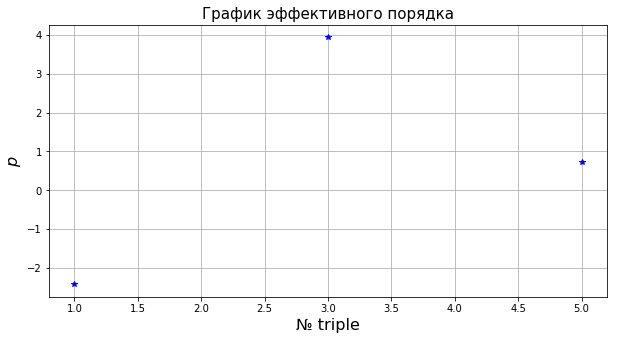

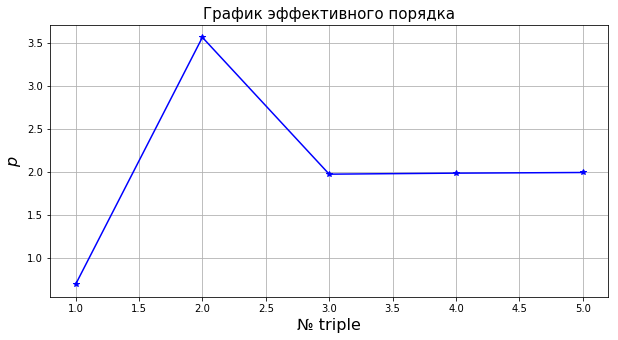

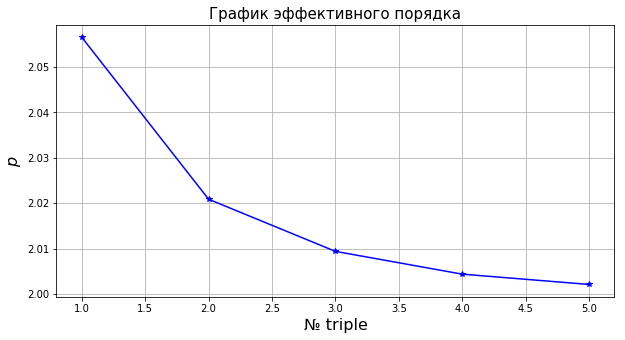

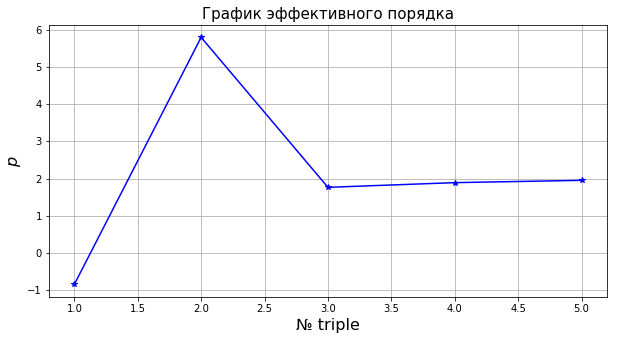

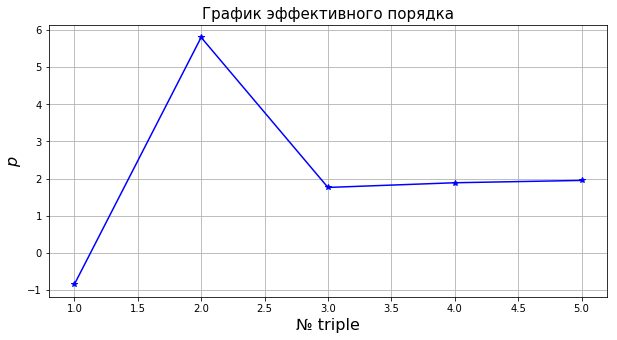

In [14]:
r = 1/2
a = 1/2

rb = [ rosenbrock_method(F, u0, np.linspace(0, 0.01, 2**i), a, G) for i in range(5, 12)]

for du in range(5):
        
    last_item = [rb[i][:,du][-1] for i in range(len(rb))]
    task1_eff_values = effective_order_of_method(last_item, r, draw_flag=True)

## Автономная система

C:\Users\Aleksandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


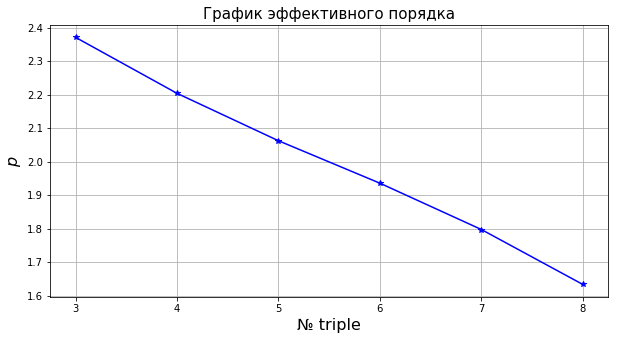

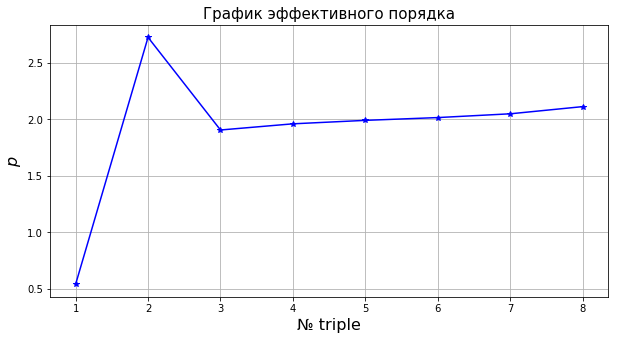

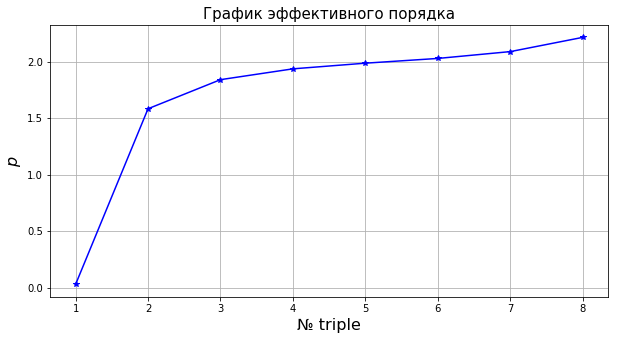

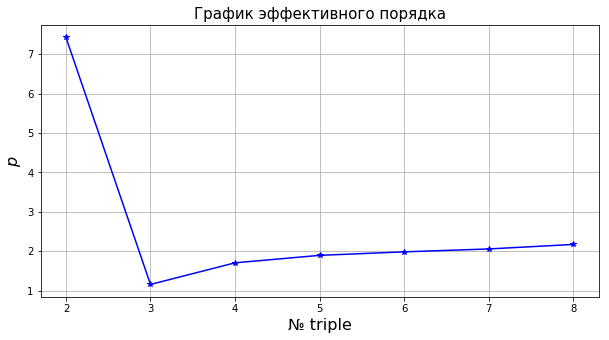

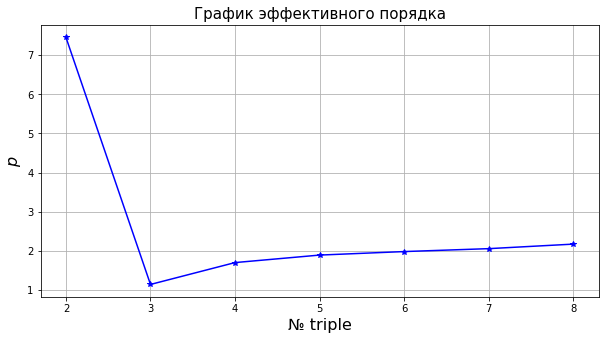

In [15]:
r = 1/2
a = 1/2

rb = [ rosenbrock_method(F_a, u0_a, np.linspace(0, 0.01, 2**i), a, G_a) for i in range(5, 15)]

for du in range(5):
        
    last_item = [rb[i][:,du][-1] for i in range(len(rb))]
    task1_eff_values = effective_order_of_method(last_item, r, draw_flag=True)

# $\alpha = \frac{1+i}{2}$

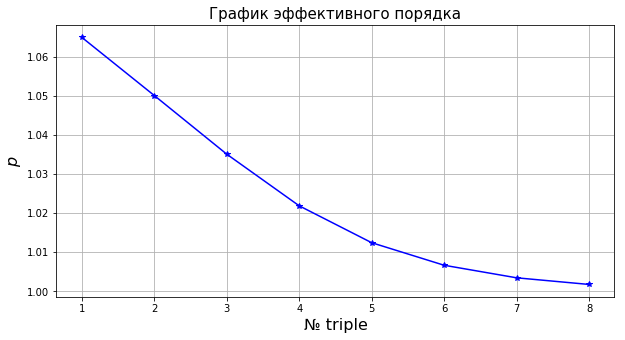

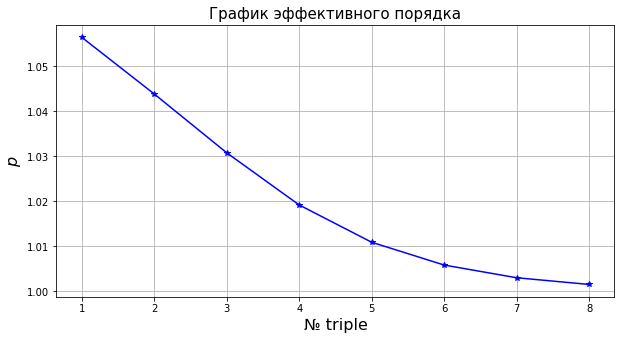

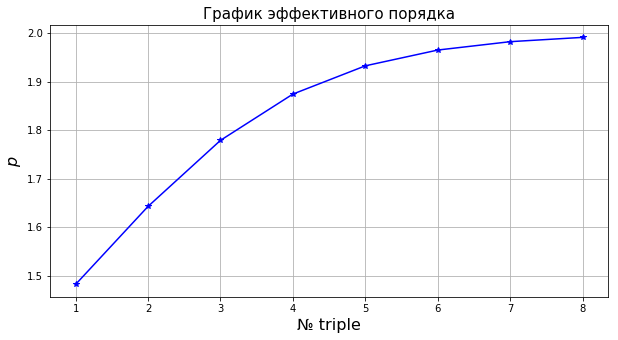

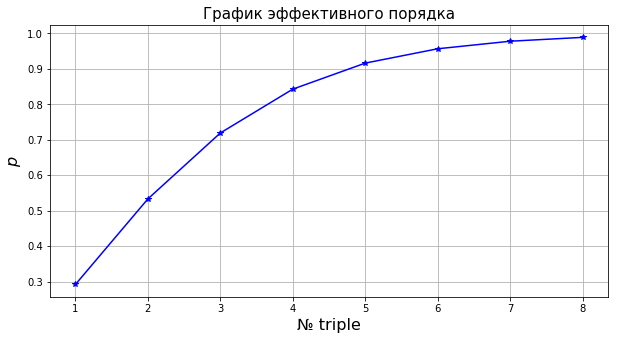

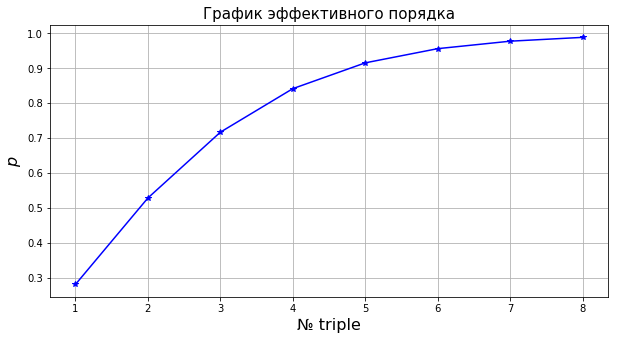

In [16]:
r = 1/2
a = 1/2 + 1/2j

rb = [ rosenbrock_method(F, u0, np.linspace(0, 0.01, 2**i), a, G) for i in range(5, 15)]

for du in range(5):
        
    last_item = [rb[i][:,du][-1] for i in range(len(rb))]
    task1_eff_values = effective_order_of_method(last_item, r, draw_flag=True)

## Автономная система

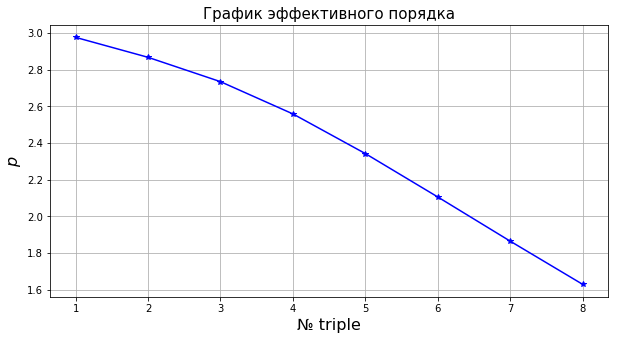

C:\Users\Aleksandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


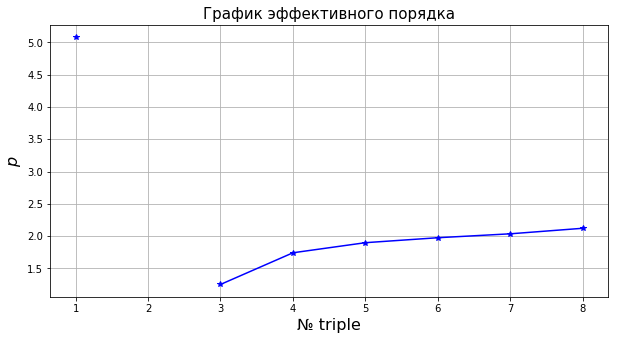

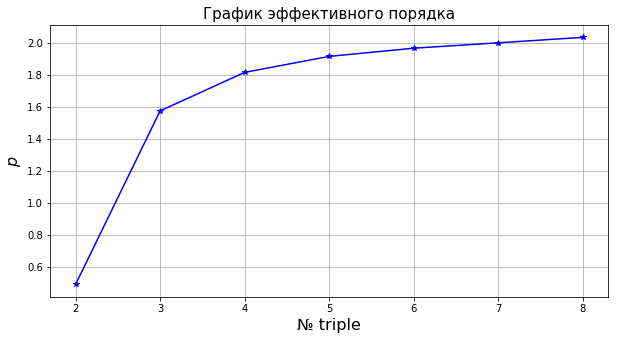

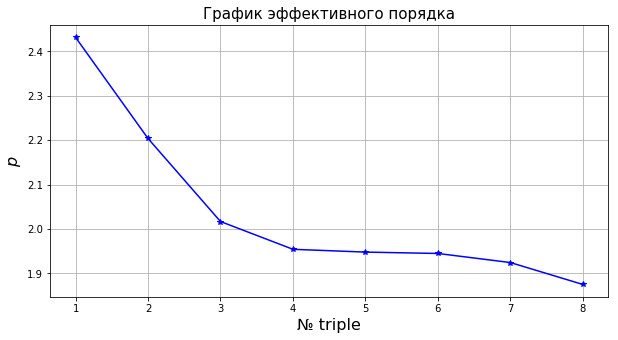

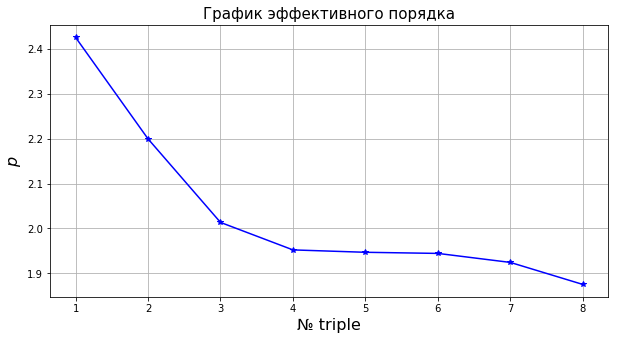

In [19]:
r = 1/2
a = 1/2 + 1/2j

rb = [ rosenbrock_method(F_a, u0_a, np.linspace(0, 0.01, 2**i), a, G_a) for i in range(5, 15)]

for du in range(5):
        
    last_item = [rb[i][:,du][-1] for i in range(len(rb))]
    task1_eff_values = effective_order_of_method(last_item, r, draw_flag=True)